# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

#Fill this in based on where you saved the training and testing data

training_file = 'SignData\\train.p'
testing_file = 'SignData\\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

0


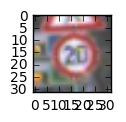

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


image=X_train[1].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print(y_train[1])





----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

Converting to grayscale

Grayscale shape: (39209, 32, 32, 1)


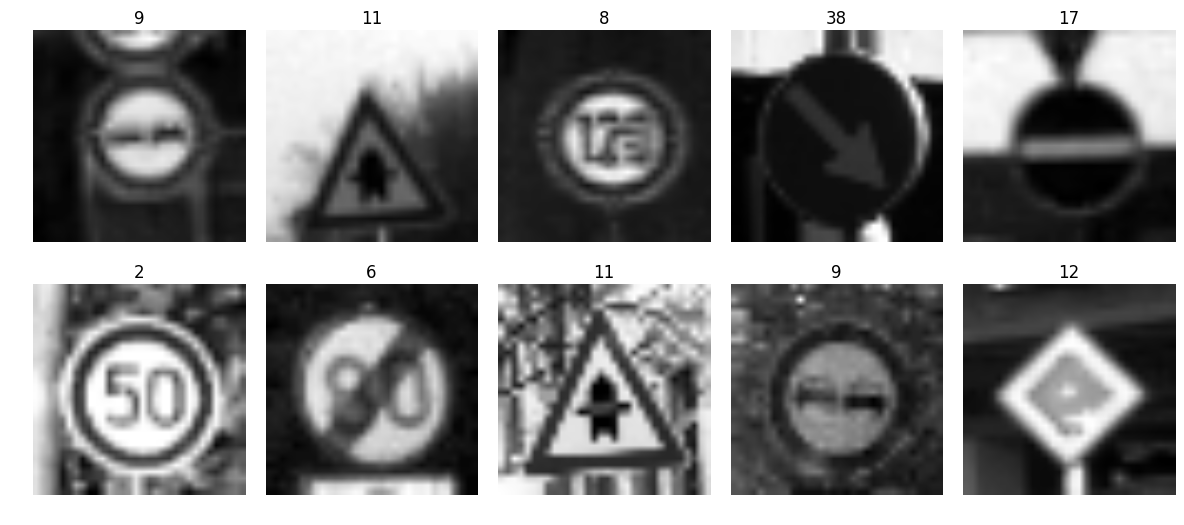

In [4]:
XTrainColor = X_train
XTrainGray = np.sum(XTrainColor/3, axis=3,  keepdims=True)
XTestColor = X_test
XTestGray = np.sum(XTestColor/3, axis=3,  keepdims=True)

print('Grayscale shape:', XTrainGray.shape)
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(XTrainGray))
    grayimage = XTrainGray[index].squeeze()
    axs[i].axis('off')
    axs[i].imshow(grayimage, cmap='gray')    
    axs[i].set_title(y_train[index])

X_train = XTrainGray
X_test = XTestGray

Here I am normalizing the training and testing set.  I am using the formula we were given for images which is take the pixel values, subtract 128, and then divide by 128

In [5]:
print('Before Normalization - Training set', np.mean(X_train))
print('Before Normalization - Test set', np.mean(X_test))

def normalizeValues(values):
    return ((values-128)/128)

# I am not normalizing the evaluation set because it is culled from the train set
normalizedTrain = normalizeValues(X_train)
normalizedTest = normalizeValues(X_test)
X_train = normalizedTrain
X_test = normalizedTest
print('Before Normalization - Training set', np.mean(X_train))
print('Before Normalization - Test set', np.mean(X_test))

Before Normalization - Training set 82.665052346
Before Normalization - Test set 82.1484603612
Before Normalization - Training set -0.354179278547
Before Normalization - Test set -0.358215153428


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I converted them out to grayscale as I dont have a GPU for processing so I figured it would be a bit faster. I also performed a normalization of the inputs and weights.

In [ ]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In this block I am splitting out the date to training, testing, and validation sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("Train", X_train.shape)
print("Test", X_test.shape)
print("validation", X_validation.shape)

Train (31367, 32, 32, 1)
Test (12630, 32, 32, 1)
validation (7842, 32, 32, 1)


Here I will shuffle the dataset

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The training data was included with the traffic sign data.  I then use train_test_split to create a validation dataset.  As far as differences, there really isnt any, besides size, I just split them into groups.


In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

Here I will set up the features and labels

In [8]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

Using the original LeNet architecture as it was suggested to us. Modified slightly to accomodate dropout (see inline comments)


In [47]:
from tensorflow.contrib.layers import flatten
dropout = False
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1 
    
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #This will give is the height and width to perform the transform.
    
    #get the weights and biases.  use math.ceil(float(in_height - filter_height + 1) / float(strides)) to get the offset.
    l1Weights = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    l1Bias = tf.Variable(tf.zeros(6))
    #run it through tensorflow conv2d
    layer1 = tf.nn.conv2d(x, l1Weights, strides=[1,1,1,1], padding = 'VALID') + l1Bias

    # Activation.
    #using a rectified linear units(relu) as this seems to be used throughout the CNN's.
    layer1 = tf.nn.relu(layer1)
    
    #Pooling. Input = 28x28x6. Output = 14x14x6.
    #use maxpooling here
    #using a stride of 2x2 will reduce the layer size to 14x14. no need to change depth
    layer1 = tf.nn.max_pool(layer1, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'VALID')
   
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    l2Weights = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    l2Bias = tf.Variable(tf.zeros(16))
    layer2 = tf.nn.conv2d(layer1, l2Weights, strides=[1,1,1,1], padding = 'VALID') + l2Bias
    
    # Activation.
    layer2 = tf.nn.relu(layer2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2 = tf.nn.max_pool(layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding = 'VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    flatLayer2 = flatten(layer2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 240.
    l3Weights = tf.Variable(tf.truncated_normal(shape= (400, 240), mean=mu, stddev = sigma))
    l3Bias = tf.Variable(tf.zeros(240))
    layer3 = tf.matmul(flatLayer2, l3Weights) + l3Bias
    
    # Activation.
    layer3 = tf.nn.relu(layer3)
    
    # Layer 4: Fully Connected. Input = 240. Output = 84.
    l4Weights = tf.Variable(tf.truncated_normal(shape=(240, 84), mean=mu, stddev = sigma))
    l4Bias = tf.Variable(tf.zeros(84))
    layer4 = tf.matmul(layer3, l4Weights) + l4Bias
    
    # Activation.
    layer4 = tf.nn.relu(layer4)
    
    # based on https://www.tensorflow.org/tutorials/mnist/pros/ I should implement dropout here before the readout layer
    if (dropout):
        tf.nn.dropout(layer4, 0.5) # set the keep probability to .5 as the lesson says you dump 1/2

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    l5Weights = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev = sigma))
    l5Bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(layer4, l5Weights) + l5Bias
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I used the standard LeNet architecture introduced to us in class.  It is a 5 layer model, with 3 fully connected layers. I then modified it to include dropout before the readout layer (layer 5).  
1: Layer 1: 32x32x1 input layer which outputs a 28x28x6 layer  
2: RELU activation  
3: Max pooling  
4: Layer 2: 28x28x6 convulation layer.  Outputs a 14x14x6 layer  
5: RELU activation  
6: Max pooling  
7: Flatten layer 2. Output of 400  
8: Layer 3:  fully connected layer, input of 400.  Outputs of 240  
8: RELU activation  
10: Layer 4:  fully connected layer, input of 240.  Outputs of 84  
11: RELU activation  
12: Implement dropout  
13: Layer 5:  fully connected layer, input of 84.  Outputs of 10  
14: RELU activation  

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

I put the variables we adjust for the training in one easy to access area

In [48]:

EPOCHS = 40
BATCH_SIZE =100
#1000 ended at  0.774
#2000 ended at 0.66
#1500 ended at .775
rate = 0.0008
#.001 ended at 80.5
#.005 ended at .58 and never really moved

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [49]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
   
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Here is where we train the model

In [50]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dropout = True
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    save_file = '.\\train_model.ckpt'   
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.849

EPOCH 2 ...
Validation Accuracy = 0.921

EPOCH 3 ...
Validation Accuracy = 0.942

EPOCH 4 ...
Validation Accuracy = 0.959

EPOCH 5 ...
Validation Accuracy = 0.957

EPOCH 6 ...
Validation Accuracy = 0.955

EPOCH 7 ...
Validation Accuracy = 0.971

EPOCH 8 ...
Validation Accuracy = 0.969

EPOCH 9 ...
Validation Accuracy = 0.976

EPOCH 10 ...
Validation Accuracy = 0.977

EPOCH 11 ...
Validation Accuracy = 0.977

EPOCH 12 ...
Validation Accuracy = 0.977

EPOCH 13 ...
Validation Accuracy = 0.966

EPOCH 14 ...
Validation Accuracy = 0.980

EPOCH 15 ...
Validation Accuracy = 0.977

EPOCH 16 ...
Validation Accuracy = 0.981

EPOCH 17 ...
Validation Accuracy = 0.974

EPOCH 18 ...
Validation Accuracy = 0.982

EPOCH 19 ...
Validation Accuracy = 0.984

EPOCH 20 ...
Validation Accuracy = 0.980

EPOCH 21 ...
Validation Accuracy = 0.961

EPOCH 22 ...
Validation Accuracy = 0.977

EPOCH 23 ...
Validation Accuracy = 0.983

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
The model was trained through lots of trial and error.  Some of the values I tried I left in the comments.  In the end I went with 40 epochs, a batch size of 100 and a learning rate of 0.0008

There was no area in here to test the model after it is trained, this seems like the logical place to insert it.

**Restore point.** Added this so I could load the training data as needed.

In [ ]:

with tf.Session() as sess:
    saver.restore(sess, "./train_model.ckpt")


**Test Set**  
Now we will run the test set through.

In [51]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dropout = False
    saver.restore(sess, "./train_model.ckpt")
    testAccuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(testAccuracy))

Test Set Accuracy = 0.927


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
This was a lot of trial and error.  I noticed the accuracy would bounce up and down between epochs, moving in both directions.  Not sure if I was hitting a local minima or not.  

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)


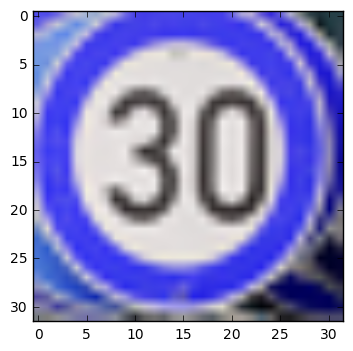

In [52]:
import cv2
import os

#path to new images
signPath = 'C:\SDC Program\JupyterNotebooks\Term1\Term1TrafficSigns\MySigns'

mySigns = []
for filename in os.listdir(signPath):
    #for file in files:
    fullPath = os.path.join(signPath, filename)
    #print(fullPath)    
    image = cv2.imread(fullPath, 3)
    mySigns.append(image)
    print(image.shape)
mySigns = np.asarray(mySigns)    
mySignsGray = np.sum(mySigns/3, axis=3,  keepdims=True)
for i in mySignsGray:
    print(i.shape)
    plt.imshow(image)



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The images all had to be resized as they were captured from a google search of images.  Sometimes when capturing the images part of the sign would be cut off which would mess with the identification i believe

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [53]:
mySignsLabels = [9,14,17,0,25,13,1]
mySignsNormal = normalizeValues(mySigns)
dropout = False
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./train_model.ckpt")
    myAccuracy = evaluate(mySignsGray, mySignsLabels)
    print("Testing Accuracy = {:.3f}".format(myAccuracy))

Testing Accuracy = 0.857


9


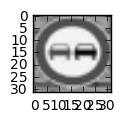

In [54]:
index = 0

image=mySignsGray[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print(mySignsLabels[index])

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** It was highly accurate, in the 90% range.  Earlier testing was in the 42% range, then I implemented dropout into the architecture, bumped the epochs from 30 to 40, and saw dramatic improvements in the answers.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [55]:
newLogits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(newLogits, k=3)


with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./train_model.ckpt")
    newLogits = sess.run(softmax_logits, feed_dict={x: mySignsGray})
    top3 = sess.run(top_k, feed_dict={x: mySignsGray})
    for i, image in enumerate(mySigns): 
        print("Top 3 choices image#{}:  ".format(i), top3[1][i][0],top3[1][i][1],top3[1][i][2])
    
   

Top 3 choices image#0:   9 0 1
Top 3 choices image#1:   14 0 1
Top 3 choices image#2:   17 0 1
Top 3 choices image#3:   3 0 1
Top 3 choices image#4:   25 0 1
Top 3 choices image#5:   13 0 1
Top 3 choices image#6:   1 0 2


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** I found it very interesting it picked sign 0 and 1 as the second and third choices for each sign.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.